## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load dataset
data = pd.read_csv('Global Power Plant Database.csv')

In [4]:
# Top 5 row of dataset
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [5]:
# Dimensions of dataset
data.shape

(908, 25)

There are 908 rows and 25 columns are present in dataset.

In [6]:
# Checking missing values
data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

Observations:
    
(1). As we know the dataset having 908 rows. There are three columns namely: "other_fuel3"," wepp_id" and "estimated_generation_gwh" are completely empty. Hence we will drop these columns.
    
(2). Column "other_fuel2" having only one enrty, it means 907 rows are empty. Hence we will drop this column.

(3). Column "other_fuel1" having morethan 75% of data is missing and it will be no use to impute all the data.Hence we will drop this column also.

In [7]:
# Drop the unwanted columns
data.drop(columns=['other_fuel1', 'other_fuel2', 'other_fuel3', 'wepp_id', 'estimated_generation_gwh'], axis=1, inplace=True)

In [8]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority


In [9]:
# Unique values
data['country'].unique()

array(['IND'], dtype=object)

In [10]:
data['country_long'].unique()

array(['India'], dtype=object)

We will drop columns "country" and "country_long" as it has one same  value. which will not help us in ML Model.

In [11]:
data.drop(columns=['country', 'country_long'], axis=1, inplace=True)

In [12]:
# Column names
data.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'year_of_capacity_data', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_data_source'],
      dtype='object')

In [13]:
# Datatypes of dataset
data.dtypes

name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
commissioning_year        float64
owner                      object
source                     object
url                        object
geolocation_source         object
year_of_capacity_data     float64
generation_gwh_2013       float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_data_source     object
dtype: object

There are 8 columns having object datatypes and rest of columns are float datatype.

In [14]:
# Statistical information
data.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,862.000000,862.000000,528.000000,520.0,384.000000,401.000000,425.000000,437.000000,443.000000
mean,321.046378,21.196189,77.447848,1996.876894,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.248627,4.907260,17.047817,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364
min,0.000000,8.168900,68.644700,1927.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,16.771575,74.258975,1988.000000,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170
50%,60.000000,21.778300,76.719250,2000.000000,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700
75%,388.125000,25.516375,79.441475,2011.250000,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000
max,4760.000000,34.649000,95.408000,2018.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017 columns mean is morethan median, skewness might be present.

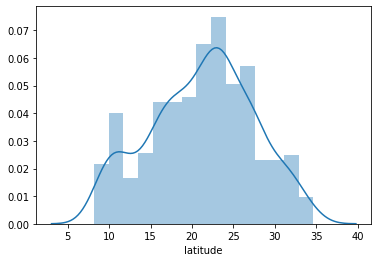

In [15]:
sns.distplot(data['latitude'])

Graph is skewed

In [16]:
data['latitude'].fillna(data['latitude'].median(), inplace=True)

Imputed null values with median values in latitude column.

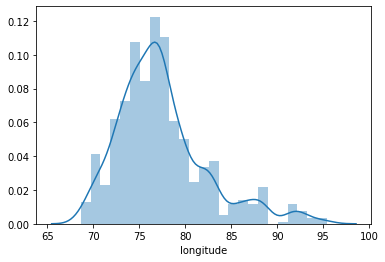

In [17]:
sns.distplot(data['longitude'])

Graph is skewed

In [18]:
data['longitude'].fillna(data['longitude'].median(), inplace=True)

Imputed null values with median values in longitude column.

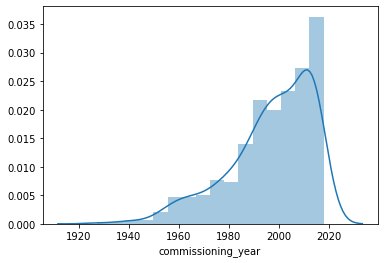

In [19]:
sns.distplot(data['commissioning_year'])

Graph is skewed

In [20]:
data['commissioning_year'].mode()

0    2013.0
dtype: float64

In [21]:
data['commissioning_year'].fillna(2013.0, inplace=True)

Imputed null values with mode value in commissioning_year column.

In [22]:
data['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [23]:
data['geolocation_source'].mode()

0    WRI
dtype: object

In [24]:
data['geolocation_source'].fillna('WRI', inplace=True)

Imputed null values with mode value in geolocation_source column.

In [25]:
data['year_of_capacity_data'].unique()

array([  nan, 2018.])

In [26]:
data['year_of_capacity_data'].mode()

0    2018.0
dtype: float64

In [27]:
data['year_of_capacity_data'].fillna(2018.0, inplace=True)

Imputed null values with mode value in year_of_capacity_data column

We can see there is one value(i.e. 2018) common in all, it will not help us in ML model, Hence we will drop this column as well.

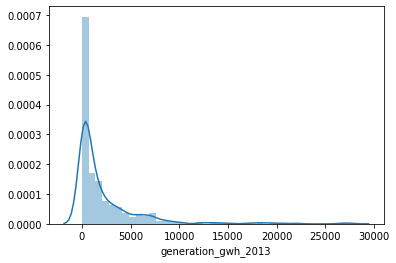

In [28]:
sns.distplot(data['generation_gwh_2013'])

Graph is skewed

In [29]:
data['generation_gwh_2013'].fillna(data['generation_gwh_2013'].median(), inplace=True)

Imputed null values with median values in generation_gwh_2013 column.

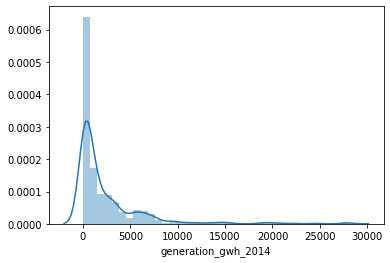

In [30]:
sns.distplot(data['generation_gwh_2014'])

Graph is skewed

In [31]:
data['generation_gwh_2014'].fillna(data['generation_gwh_2014'].median(), inplace=True)

Imputed null values with median values in generation_gwh_2014 column.

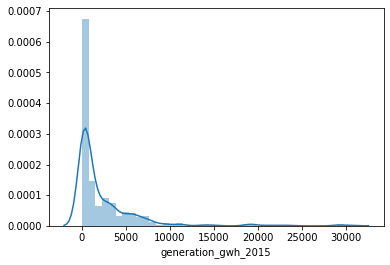

In [32]:
sns.distplot(data['generation_gwh_2015'])

Graph is skewed.

In [33]:
data['generation_gwh_2015'].fillna(data['generation_gwh_2015'].median(), inplace=True)

Imputed null values with median values in generation_gwh_2015 column.

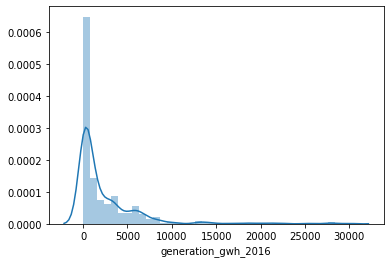

In [34]:
sns.distplot(data['generation_gwh_2016'])

Graph is skewed.

In [35]:
data['generation_gwh_2016'].fillna(data['generation_gwh_2016'].median(), inplace=True)

Imputed null values with median values in generation_gwh_2016 column.

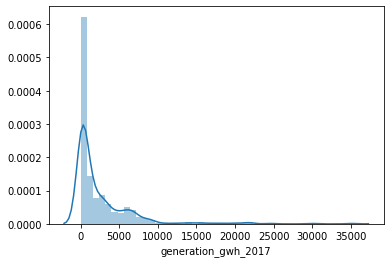

In [36]:
sns.distplot(data['generation_gwh_2017'])

Graph is skewed.

In [37]:
data['generation_gwh_2017'].fillna(data['generation_gwh_2017'].median(), inplace=True)

Imputed null values with median values in generation_gwh_2017 column.

In [38]:
data['generation_data_source'].unique()

array([nan, 'Central Electricity Authority'], dtype=object)

In [39]:
data['generation_data_source'].mode()

0    Central Electricity Authority
dtype: object

In [40]:
data['generation_data_source'].fillna('Central Electricity Authority', inplace=True)

Imputed null values with mode value in generation_data_source column

We can see there is one value(i.e. Central Electricity Authority) common in all, it will not help us in ML model, Hence we will drop this column as well

In [41]:
data.isnull().sum()

name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
commissioning_year          0
owner                     566
source                      0
url                         0
geolocation_source          0
year_of_capacity_data       0
generation_gwh_2013         0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_data_source      0
dtype: int64

owner column we need to drop it hence did not impute it. 

name column drop as it as its different for every row. 

url will drop it as its different for all rows. 

source will drop it as its different for many data. 

gddp_idnr also will drop as its in object type and unique for every row.

In [42]:
data.drop(columns=['name', 'gppd_idnr', 'owner', 'source', 'url', 'year_of_capacity_data', 'generation_data_source'], axis=1, inplace=True)

In [43]:
data.head(3)

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,797.063475,805.76,701.02725,716.72835,807.6017
1,98.0,24.7663,74.6090,Coal,2013.0,WRI,797.063475,805.76,701.02725,716.72835,807.6017
2,39.2,21.9038,69.3732,Wind,2013.0,WRI,797.063475,805.76,701.02725,716.72835,807.6017


In [44]:
data.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

Now, as we see data is cleaned, there is no missing values.

## Exploratory Data Analysis (EDA)

In [45]:
a = data.describe(include=['O']).columns

saving all the object datatype in a variable.

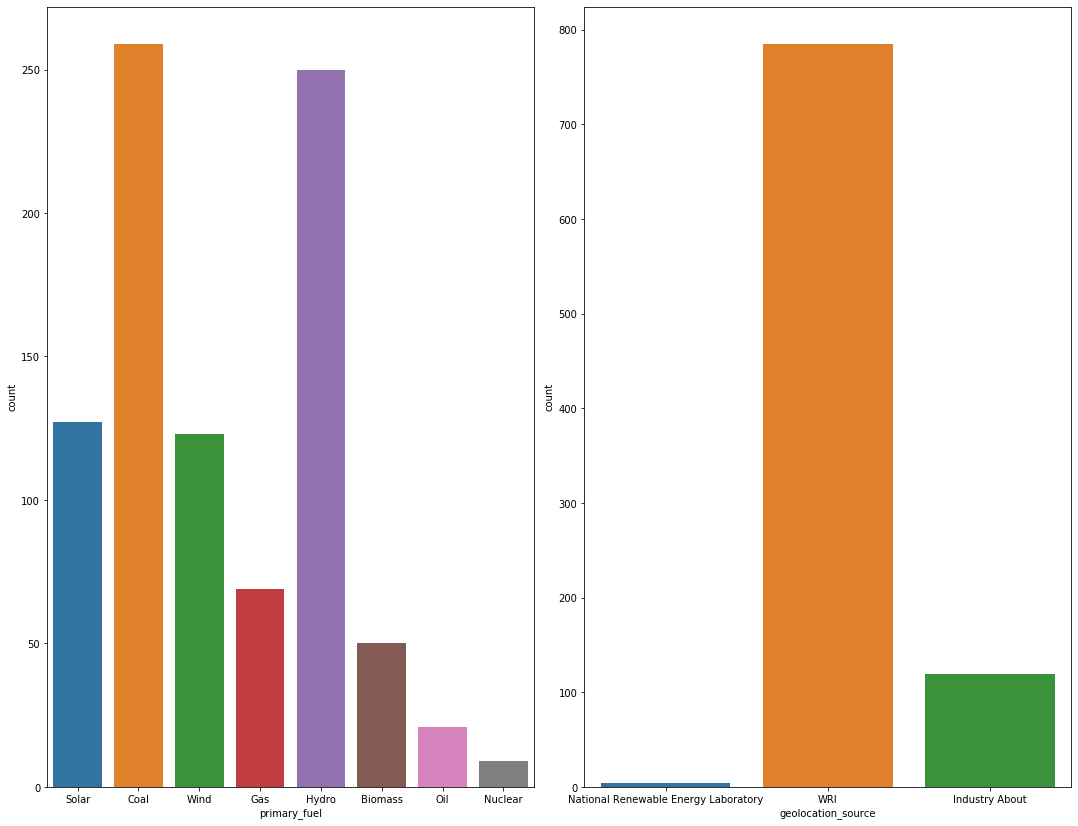

In [46]:
plt.figure(figsize=(30, 34))
for i in range(len(a)):
    plt.subplot(3,4,i+1)
    sns.countplot(data[a[i]])
    plt.tight_layout()

Max power plan, primary fuel is coal then followed by hydro, least is nuclear.

Max geolocation source is WRI. 

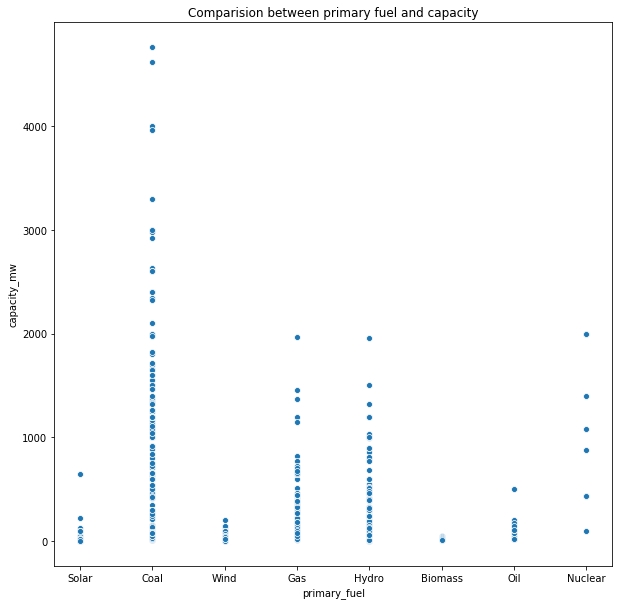

In [47]:
plt.figure(figsize=(10, 10))
plt.title("Comparision between primary fuel and capacity")
sns.scatterplot(data['primary_fuel'], data['capacity_mw'])

generation capacity of coal looks morethan other fuels.

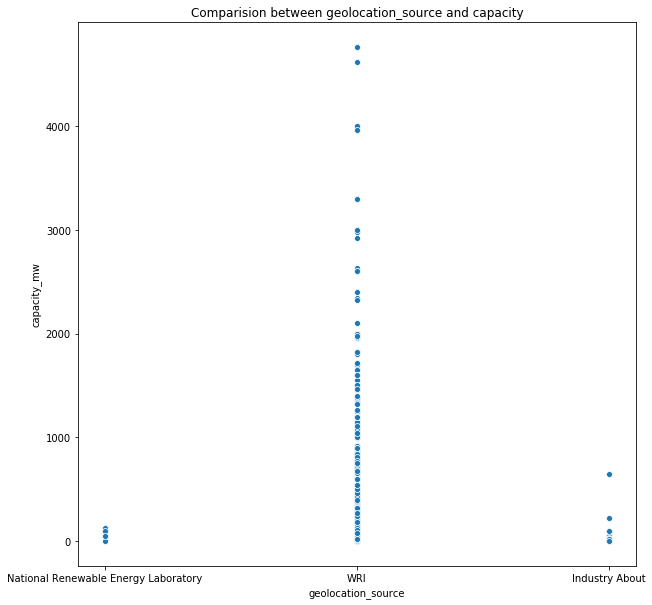

In [48]:
plt.figure(figsize=(10, 10))
plt.title("Comparision between geolocation_source and capacity")
sns.scatterplot(data['geolocation_source'], data['capacity_mw'])

WRI geolocation source has maximum generation capacity.

In [49]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for i in a:
    data[i] = LE.fit_transform(data[i])

encoding the object datatype column.

In [50]:
# Checking the random data from dataset
data.sample(10)

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
729,42.0,12.3082,77.1650,3,1927.0,2,217.974650,220.82035,215.37770,144.414300,175.925950
381,90.0,27.0786,82.0841,1,2012.0,2,443.420000,483.04300,336.85400,418.960000,173.234000
62,1320.0,25.4865,85.7452,1,2014.0,2,4.871350,1221.00000,4056.00000,7177.000000,8778.000000
197,25.0,24.5216,72.1999,6,2013.0,0,797.063475,805.76000,701.02725,716.728350,807.601700
145,36.0,32.7369,76.2477,3,2017.0,2,797.063475,805.76000,701.02725,716.728350,79.022900
900,600.0,30.1081,77.3257,1,2007.0,2,3158.016000,3194.35982,3709.55220,3123.572061,3156.053669
412,33.0,23.3183,68.6988,7,2013.0,2,797.063475,805.76000,701.02725,716.728350,807.601700
443,2.4,17.8613,74.0733,7,2013.0,2,797.063475,805.76000,701.02725,716.728350,807.601700
567,12.0,19.4834,75.3696,3,1984.0,2,797.063475,805.76000,701.02725,716.728350,807.601700
758,100.0,17.2387,73.9096,7,2013.0,2,797.063475,805.76000,701.02725,716.728350,807.601700


In [51]:
# Correlation of dataset
corr =data.corr()
corr

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
capacity_mw,1.000000,0.047608,0.200473,-0.377783,0.012518,0.204698,0.756523,0.804581,0.830400,0.863989,0.877058
latitude,0.047608,1.000000,0.030775,-0.010793,0.034731,-0.182049,0.053106,0.057527,0.052797,0.046684,0.056430
longitude,0.200473,0.030775,1.000000,-0.352749,-0.144785,0.249233,0.102637,0.107967,0.125723,0.148405,0.156255
primary_fuel,-0.377783,-0.010793,-0.352749,1.000000,0.145487,-0.482803,-0.228761,-0.240407,-0.249826,-0.260900,-0.263818
commissioning_year,0.012518,0.034731,-0.144785,0.145487,1.000000,-0.242439,-0.043554,-0.017599,0.005967,0.030519,0.042622
geolocation_source,0.204698,-0.182049,0.249233,-0.482803,-0.242439,1.000000,0.097530,0.100988,0.105880,0.109612,0.108809
generation_gwh_2013,0.756523,0.053106,0.102637,-0.228761,-0.043554,0.097530,1.000000,0.970385,0.907385,0.878836,0.839297
generation_gwh_2014,0.804581,0.057527,0.107967,-0.240407,-0.017599,0.100988,0.970385,1.000000,0.963664,0.935000,0.903986
generation_gwh_2015,0.830400,0.052797,0.125723,-0.249826,0.005967,0.105880,0.907385,0.963664,1.000000,0.973256,0.940284
generation_gwh_2016,0.863989,0.046684,0.148405,-0.260900,0.030519,0.109612,0.878836,0.935000,0.973256,1.000000,0.973960


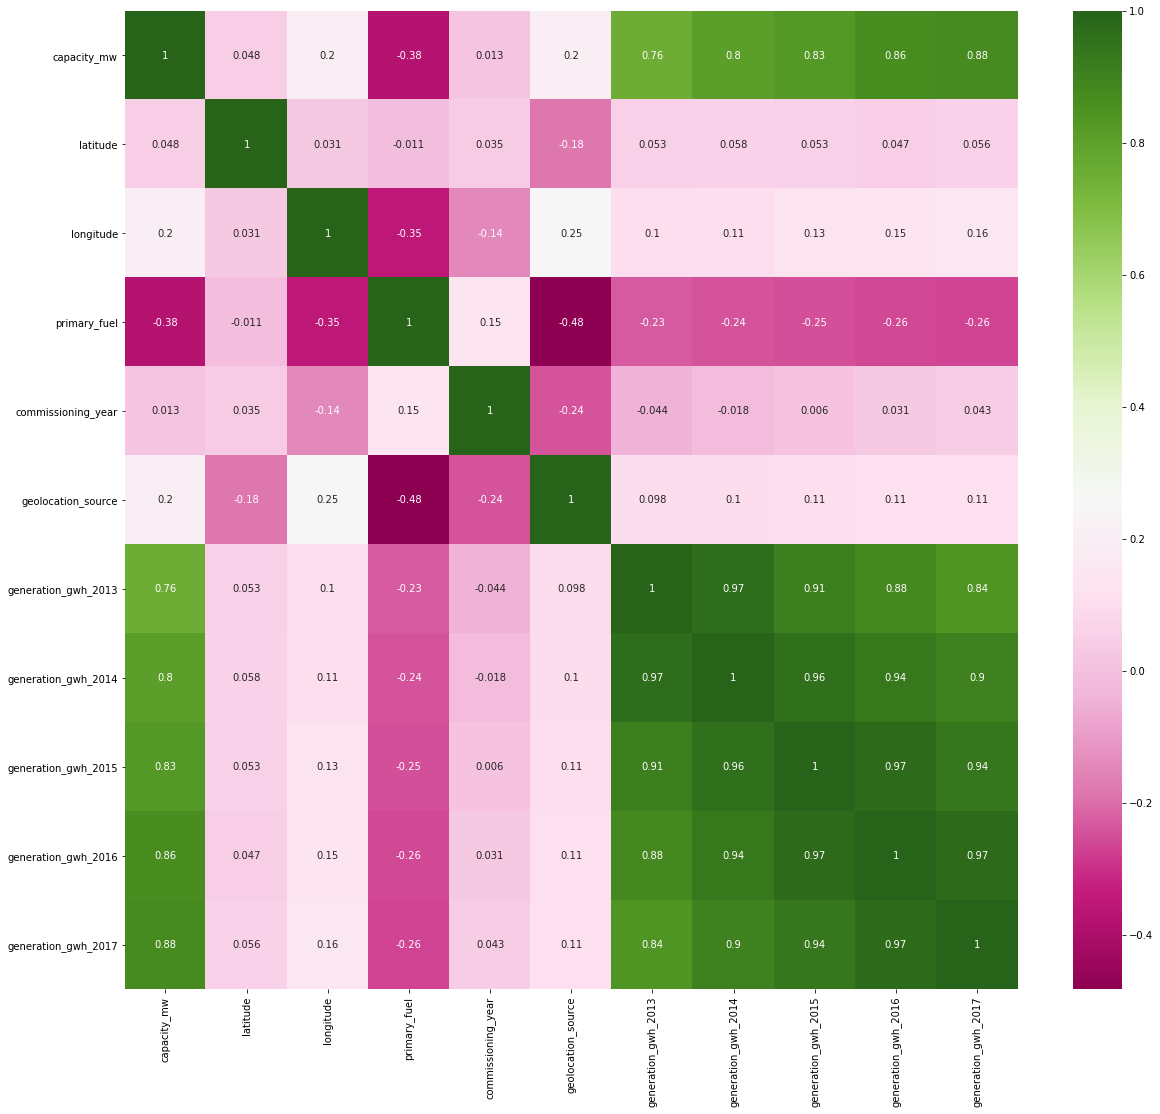

In [52]:
# Heatmap
corr = data.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(corr, cmap='PiYG', annot=True)

Observations:

(i). for "primary_fuel" target variable --> not much of a correlation can be seen, it can be a bad model, high correlation with target variable "primary_fuel" is with "commissioning_year". 

(ii). for "capacity_mw" target variable --> generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017 have high correlation, they have highly correlated with each other too.

capacity_mw               AxesSubplot(0.125,0.657941;0.0824468x0.222059)
latitude               AxesSubplot(0.223936,0.657941;0.0824468x0.222059)
longitude              AxesSubplot(0.322872,0.657941;0.0824468x0.222059)
primary_fuel           AxesSubplot(0.421809,0.657941;0.0824468x0.222059)
commissioning_year     AxesSubplot(0.520745,0.657941;0.0824468x0.222059)
geolocation_source     AxesSubplot(0.619681,0.657941;0.0824468x0.222059)
generation_gwh_2013    AxesSubplot(0.718617,0.657941;0.0824468x0.222059)
generation_gwh_2014    AxesSubplot(0.817553,0.657941;0.0824468x0.222059)
generation_gwh_2015       AxesSubplot(0.125,0.391471;0.0824468x0.222059)
generation_gwh_2016    AxesSubplot(0.223936,0.391471;0.0824468x0.222059)
generation_gwh_2017    AxesSubplot(0.322872,0.391471;0.0824468x0.222059)
dtype: object

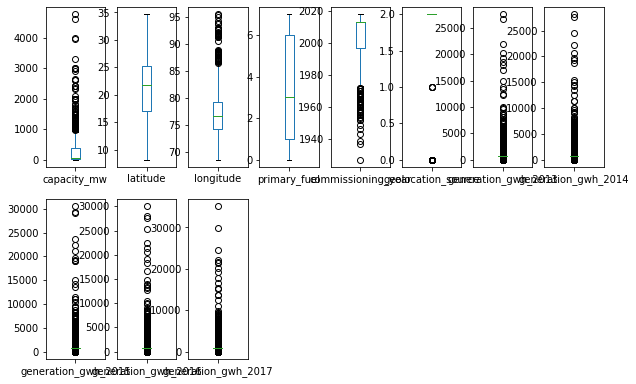

In [53]:
# Checking Outliers
data.plot(kind='box', subplots=True, layout=(3,8), figsize=(10, 10))

There are many Outliers present.

In [54]:
# Removing Outliers
from scipy.stats import zscore
z = np.abs(zscore(data))
threshold=3
np.where(z>3)

(array([ 15,  15,  15,  15, 144, 144, 144, 144, 144, 144, 159, 159, 180,
        184, 210, 210, 210, 210, 210, 210, 222, 240, 245, 309, 309, 309,
        309, 309, 309, 324, 334, 341, 343, 361, 364, 365, 365, 365, 365,
        365, 365, 372, 376, 389, 417, 428, 445, 455, 479, 483, 485, 494,
        494, 494, 494, 494, 494, 495, 495, 495, 495, 495, 495, 500, 520,
        530, 533, 533, 539, 542, 547, 575, 584, 602, 622, 624, 639, 649,
        649, 649, 649, 649, 649, 658, 658, 658, 658, 658, 658, 696, 696,
        696, 696, 696, 707, 710, 722, 722, 722, 722, 722, 725, 725, 725,
        725, 725, 727, 727, 727, 727, 727, 727, 729, 787, 787, 787, 787,
        787, 787, 789, 808, 809, 809, 809, 809, 809, 809, 819, 848, 849,
        849, 881, 881, 881, 881, 881, 881], dtype=int64),
 array([ 0,  8,  9, 10,  0,  6,  7,  8,  9, 10,  6,  7,  2,  2,  0,  6,  7,
         8,  9, 10,  4,  2,  2,  0,  6,  7,  8,  9, 10,  2,  2,  2,  4,  2,
         0,  0,  6,  7,  8,  9, 10,  4,  0,  2,  2,  2,  4, 

In [55]:
df = data[(z<3).all(axis=1)]
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,2011.0,1,797.063475,805.760000,701.02725,716.728350,807.601700
1,98.0,24.7663,74.6090,1,2013.0,2,797.063475,805.760000,701.02725,716.728350,807.601700
2,39.2,21.9038,69.3732,7,2013.0,2,797.063475,805.760000,701.02725,716.728350,807.601700
3,135.0,23.8712,91.3602,2,2004.0,2,631.777928,617.789264,843.74700,886.004428,663.774500
4,1800.0,21.9603,82.4091,1,2015.0,2,1668.290000,3035.550000,5916.37000,6243.000000,5385.579736


In [56]:
# Dimensions of dataset before removing outliers.
data.shape

(908, 11)

In [57]:
# Dimensions of dataset after removing outliers.
df.shape

(849, 11)

In [58]:
# Data Loss
Data_loss = ((908-849)/908)*100
Data_loss

6.497797356828194

As we can see that the Data loss is less than 7%.

# Building the Regression Models

In [59]:
# Spltting x and y variable
x = df.drop('capacity_mw', axis=1)
y = df['capacity_mw']
print(x.shape)
print(y.shape)

(849, 10)
(849,)


In [60]:
# Checking the skewness
x.skew()

latitude              -0.124563
longitude              0.895847
primary_fuel           0.407005
commissioning_year    -1.618612
geolocation_source    -2.062603
generation_gwh_2013    3.094504
generation_gwh_2014    2.946561
generation_gwh_2015    2.734416
generation_gwh_2016    2.679350
generation_gwh_2017    2.574220
dtype: float64

skewness present in multiple columns.

In [61]:
# Removing the skewness
x['generation_gwh_2013'] = np.cbrt(x['generation_gwh_2013'])

In [62]:
x['generation_gwh_2014'] = np.cbrt(x['generation_gwh_2014'])

In [63]:
x['generation_gwh_2015'] = np.cbrt(x['generation_gwh_2015'])

In [64]:
x['generation_gwh_2016'] = np.cbrt(x['generation_gwh_2016'])

In [65]:
x['generation_gwh_2017'] = np.cbrt(x['generation_gwh_2017'])

In [66]:
x['longitude'] = np.log1p(x['longitude'])

In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 1.15130021, -0.89596258,  1.17176049, ..., -0.0771076 ,
        -0.08184005, -0.05111969],
       [ 0.59306324, -0.55100184, -0.97874676, ..., -0.0771076 ,
        -0.08184005, -0.05111969],
       [ 0.1254973 , -1.90650841,  1.60186194, ..., -0.0771076 ,
        -0.08184005, -0.05111969],
       ...,
       [-0.95713222, -0.3096989 ,  1.60186194, ..., -0.0771076 ,
        -0.08184005, -0.05111969],
       [ 0.52506404, -0.76740747, -0.97874676, ..., -0.0771076 ,
        -0.08184005, -0.05111969],
       [-1.82960617,  0.15218147,  1.60186194, ..., -0.0771076 ,
        -0.08184005, -0.05111969]])

Scaled the dataset

## Training and Testing of model

In [88]:
# Importing various Regression models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [89]:
# Choose Best random state for better accuracy
def select_model(model):
    maxAccu = 0
    maxRS = 0
    for i in range(1, 200):
        x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=i)
        LR=model()
        LR.fit(x_train, y_train)
        pred=LR.predict(x_test)
        accu=r2_score(y_test, pred)
        if accu>maxAccu:
            maxAccu=accu
            maxRS=i
    print("Best Accuracy is",maxAccu,"on random state",maxRS)

## Linear Regression

In [90]:
LR=select_model(LinearRegression)
LR

Best Accuracy is 0.6672708739527577 on random state 41


In [91]:
# cross validation score 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=41)
from sklearn.model_selection import cross_val_score
score = cross_val_score(LinearRegression(),x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.47223001 0.43443993 0.41753233 0.54540298 0.49598343]
0.47311773821764386
0.045463160578441214


## Decision Tree Regressor

In [92]:
dtr=select_model(DecisionTreeRegressor)
dtr

Best Accuracy is 0.832867330921855 on random state 24


In [93]:
# cross validation score 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=24)
from sklearn.model_selection import cross_val_score
score = cross_val_score(DecisionTreeRegressor(),x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.69829075 0.6556708  0.58140198 0.56808215 0.69791114]
0.6402713625087788
0.055861654917425355


## KNeighbors Regressor

In [94]:
knr=select_model(KNeighborsRegressor)
knr

Best Accuracy is 0.8633155999893147 on random state 16


In [95]:
# cross validation score 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=16)
from sklearn.model_selection import cross_val_score
score = cross_val_score(KNeighborsRegressor(),x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.76532298 0.82624355 0.65054288 0.73041259 0.7515664 ]
0.7448176794997307
0.05690594051182541


## Random Forest Regressor

In [96]:
rfr=select_model(RandomForestRegressor)
rfr

Best Accuracy is 0.8817234520342246 on random state 180


In [97]:
# cross validation score 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=180)
from sklearn.model_selection import cross_val_score
score = cross_val_score(RandomForestRegressor(),x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.80242981 0.84641446 0.69042037 0.7683108  0.79800342]
0.7811157702583185
0.05175523636816883


## AdaBoost Regressor

In [98]:
abr=select_model(AdaBoostRegressor)
abr

Best Accuracy is 0.7449220521671029 on random state 179


In [99]:
# cross validation score 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=179)
from sklearn.model_selection import cross_val_score
score = cross_val_score(AdaBoostRegressor(),x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.55167843 0.48700743 0.56151551 0.54509093 0.5715431 ]
0.5433670802306485
0.029569289612403304


## Gradient Boosting Regressor

In [100]:
gbr=select_model(GradientBoostingRegressor)
gbr

Best Accuracy is 0.8777713715519113 on random state 166


In [101]:
# cross validation score 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=166)
from sklearn.model_selection import cross_val_score
score = cross_val_score(GradientBoostingRegressor(),x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.79361867 0.85026093 0.69878655 0.68684199 0.7547206 ]
0.7568457489698796
0.06058804599958558


From the above algorithms, we can say that the RandomForestRegressor is working well by giving an accuracy of 88.17% and cross validation score of 80.24%

## Saving the Model

In [102]:
import joblib
joblib.dump(rfr, 'GPP_Regressor.pkl')

['GPP_Regressor.pkl']

# Building the Classification Models

## Exploratory Data Analysis (EDA)

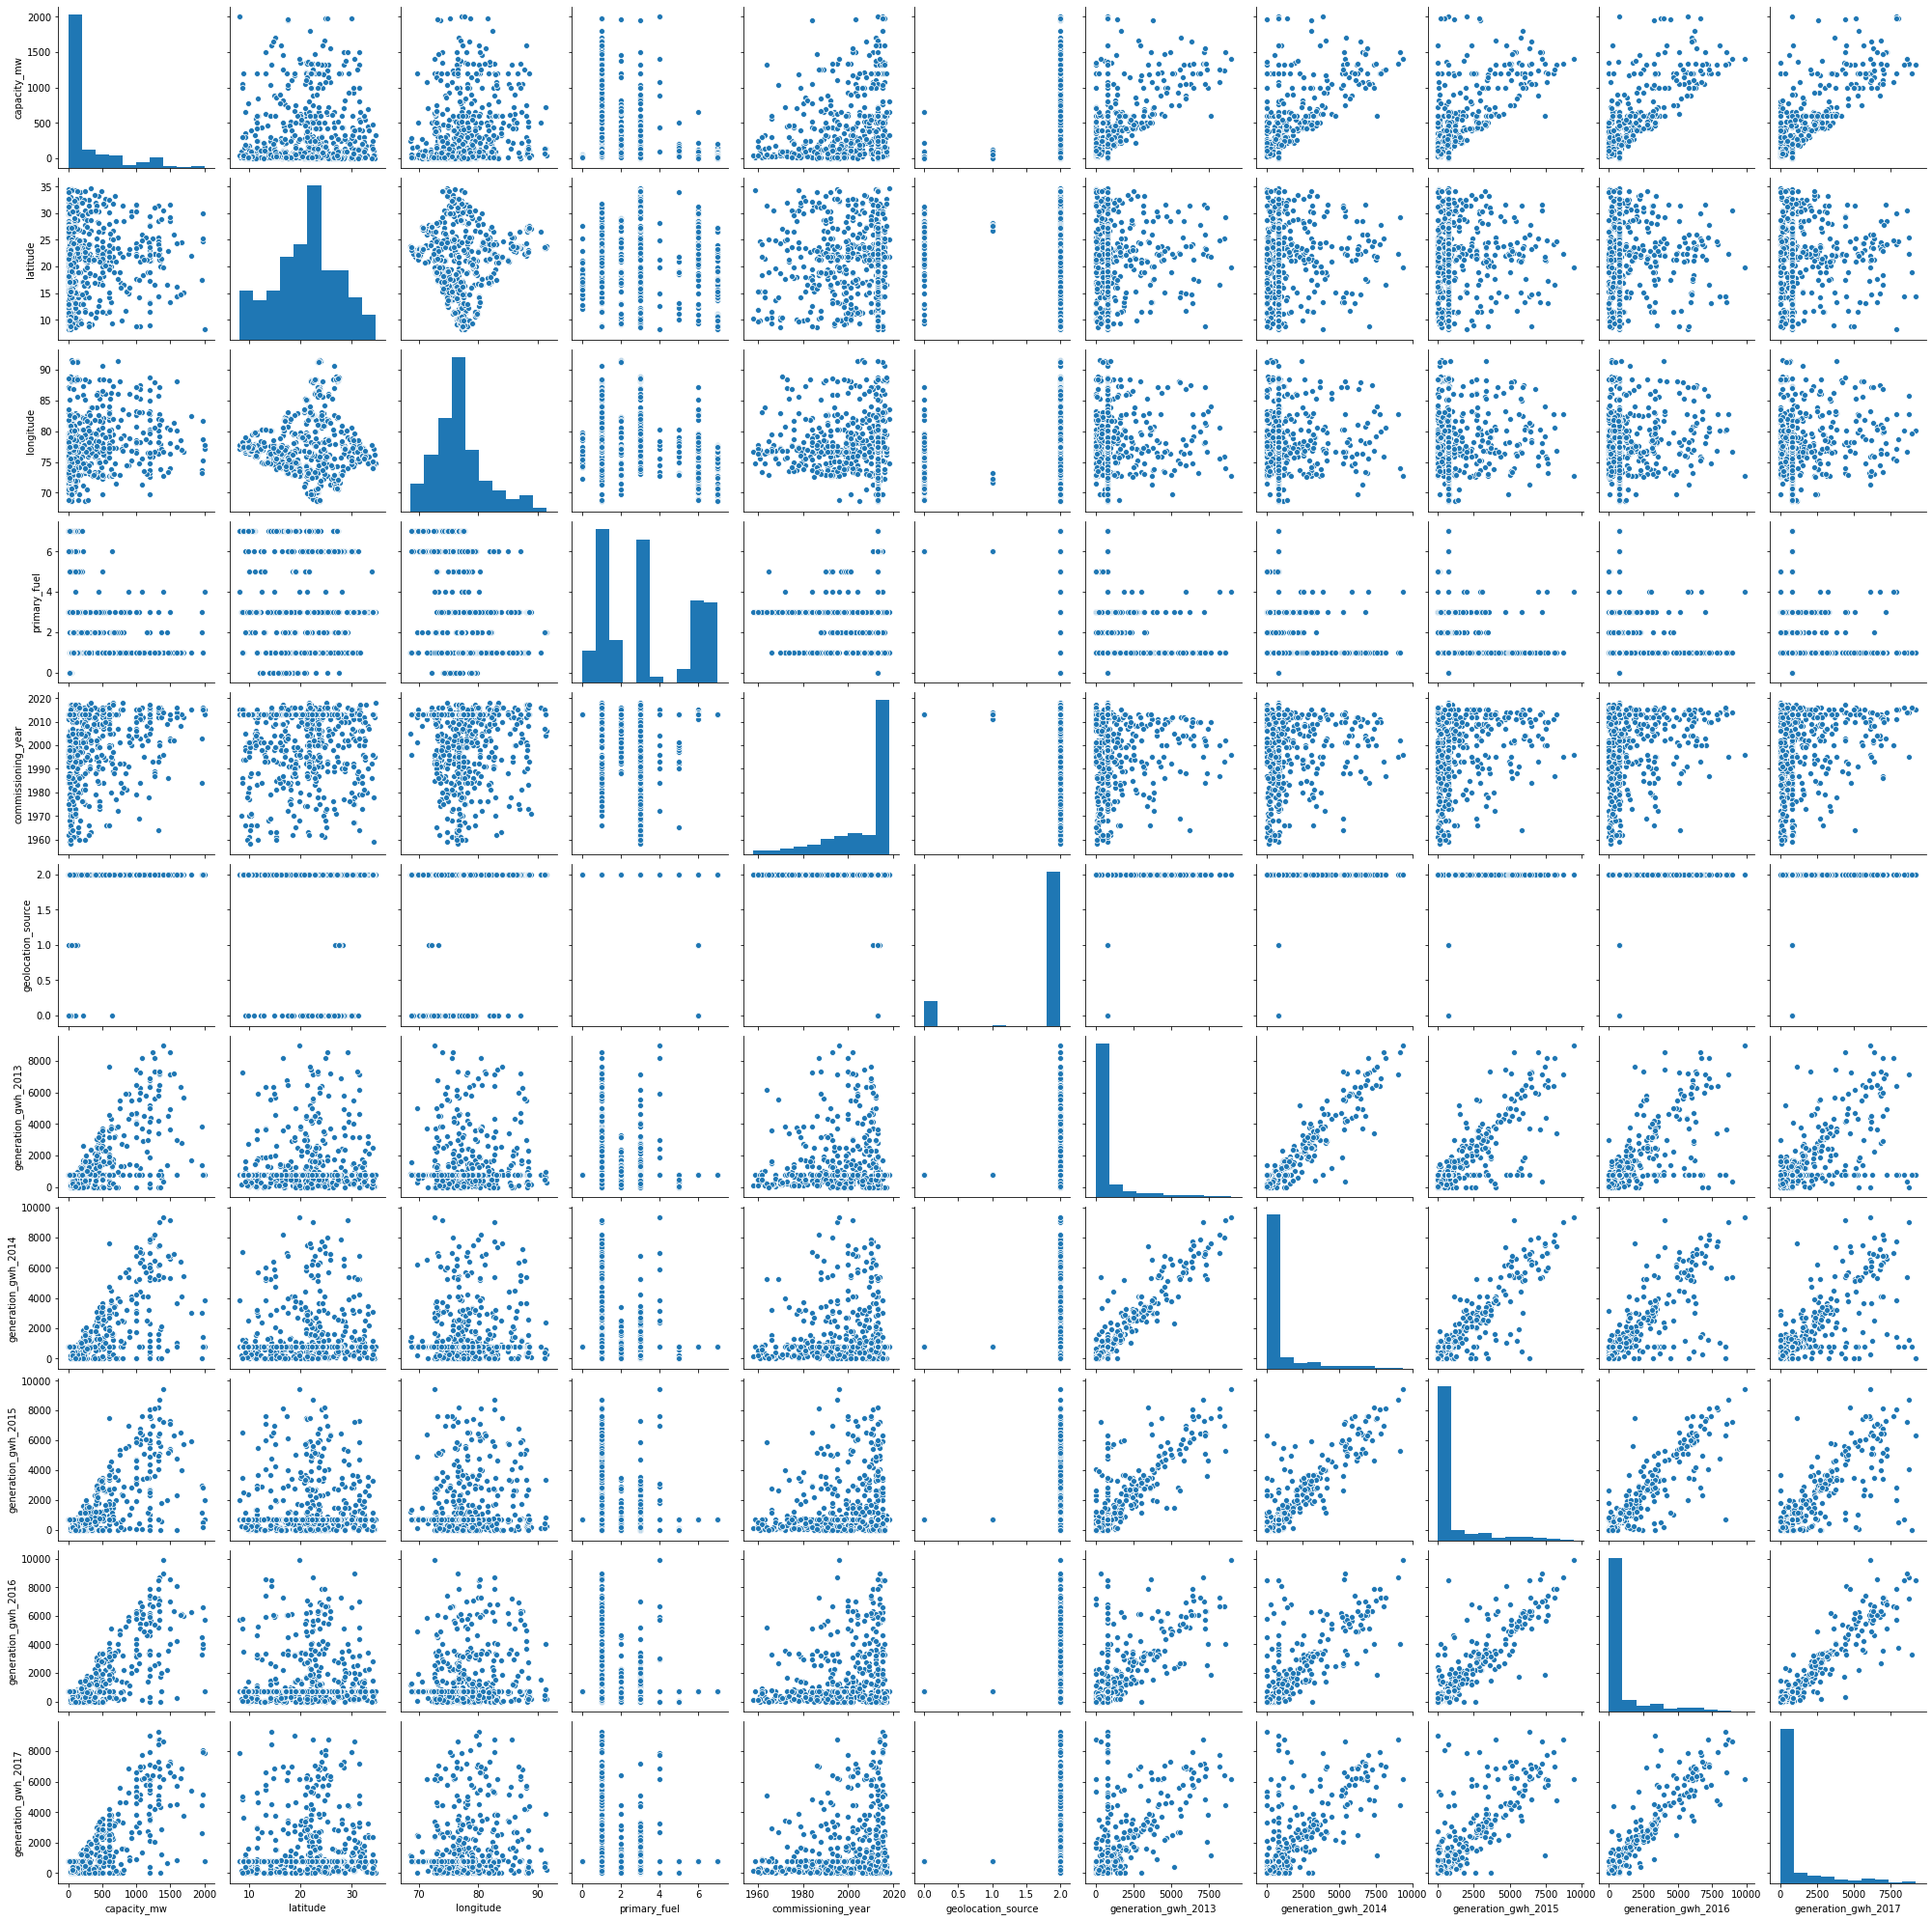

In [104]:
sns.pairplot(df)

Primary fuel with coal has high capacity_mw

Coal fuel has high generation in all the years 2013, 2014, 2015, 2017, 2017

In [105]:
# Spltting x and y variable
x = df.drop('primary_fuel', axis=1)
y = df['primary_fuel']
print(x.shape)
print(y.shape)

(849, 10)
(849,)


In [106]:
# Checking the skewness
x.skew()

capacity_mw            1.990863
latitude              -0.124563
longitude              0.895847
commissioning_year    -1.618612
geolocation_source    -2.062603
generation_gwh_2013    3.094504
generation_gwh_2014    2.946561
generation_gwh_2015    2.734416
generation_gwh_2016    2.679350
generation_gwh_2017    2.574220
dtype: float64

In [107]:
# Removing the skewness
x['generation_gwh_2013'] = np.cbrt(x['generation_gwh_2013'])

In [108]:
x['generation_gwh_2014'] = np.cbrt(x['generation_gwh_2014'])

In [109]:
x['generation_gwh_2015'] = np.cbrt(x['generation_gwh_2015'])

In [110]:
x['generation_gwh_2016'] = np.cbrt(x['generation_gwh_2016'])

In [111]:
x['generation_gwh_2017'] = np.cbrt(x['generation_gwh_2017'])

In [112]:
x['capacity_mw'] = np.log1p(x['capacity_mw'])

removed the skewness

## Scaling the data

In [113]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-1.63898465,  1.15130021, -0.88280944, ..., -0.0771076 ,
        -0.08184005, -0.05111969],
       [ 0.20518779,  0.59306324, -0.55782569, ..., -0.0771076 ,
        -0.08184005, -0.05111969],
       [-0.29208576,  0.1254973 , -1.80137604, ..., -0.0771076 ,
        -0.08184005, -0.05111969],
       ...,
       [-0.52201564, -0.95713222, -0.32694305, ..., -0.0771076 ,
        -0.08184005, -0.05111969],
       [ 0.09446612,  0.52506404, -0.76239231, ..., -0.0771076 ,
        -0.08184005, -0.05111969],
       [-0.75096427, -1.82960617,  0.12330302, ..., -0.0771076 ,
        -0.08184005, -0.05111969]])

Scaled the dataset

## Trainig and testing of model

In [114]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [115]:
# Creating train test split using best random state
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.2, random_state=28)

In [116]:
# Importing various classification models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [117]:
# Initializing the instance of the model
Lr = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()

In [118]:
models = []
models.append(('LogisticRegression',Lr))
models.append(('GaussianNB',gnb))
models.append(('SupportVectorClassifier',svc))
models.append(('DecisionTreeClassifier',dtc))
models.append(('KNeighborsClassifier',knc))

In [119]:
# Importing required modules
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [120]:
Model = []
Score = []
CV_Score = []

for name, model in models:
    print('----------------------------',name,'------------------------------')
    print('\n')
    Model.append(name)
    model.fit(x_train, y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    
    AS=accuracy_score(y_test, pre)
    print('accuracy_score: ', AS)
    Score.append(AS*100)
    print('\n')
    
    cvs=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('cross_val_score: ', cvs)
    CV_Score.append(cvs*100)
    print('\n')
   
    print('Classification report: \n')
    print(classification_report(y_test, pre))
    print('Confusion matrix: \n')
    cm=confusion_matrix(y_test, pre)
    print(cm)
    print('\n')

---------------------------- LogisticRegression ------------------------------


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


accuracy_score:  0.6588235294117647


cross_val_score:  0.692579185520362


Classification report: 

              precision    recall  f1-score   support

           0       0.50      0.08      0.13        13
           1       0.61      0.77      0.68        47
           2       0.60      0.20      0.30        15
           3       0.76      0.72      0.74        40
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         4
           6       1.00      0.95      0.98        21
           7       0.50      0.82      0.62        28

  

In [121]:
# Result store in DataFrame
Result = pd.DataFrame({'Model':Model, 'Accuracy Score':Score, 'CV Score':CV_Score})
Result

,Model,Accuracy Score,CV Score
0,LogisticRegression,65.882353,69.257919
1,GaussianNB,59.411765,68.201183
2,SupportVectorClassifier,65.882353,73.502262
3,DecisionTreeClassifier,74.117647,77.148625
4,KNeighborsClassifier,72.941176,77.626871


In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [124]:
def select_model(model):
    maxAccu = 0
    maxRS = 0
    for i in range(1, 200):
        x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=i)
        Lr=model()
        Lr.fit(x_train, y_train)
        pred=Lr.predict(x_test)
        accu=r2_score(y_test, pred)
        if accu>maxAccu:
            maxAccu=accu
            maxRS=i
    print("Best Accuracy is",maxAccu,"on random state",maxRS)

## Random Forest Classifier

In [125]:
RFC = select_model(RandomForestClassifier)
RFC

Best Accuracy is 0.8807421310113535 on random state 99


In [126]:
# cross validation score 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=99)
from sklearn.model_selection import cross_val_score
score = cross_val_score(RandomForestClassifier(),x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.79411765 0.79411765 0.83529412 0.82941176 0.80473373]
0.8115349808562478
0.01753316889819446


## AdaBoost Classifier

In [127]:
ABC = select_model(AdaBoostClassifier)
ABC

Best Accuracy is 0.3872284154248664 on random state 125


In [128]:
# cross validation score 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=125)
from sklearn.model_selection import cross_val_score
score = cross_val_score(AdaBoostClassifier(),x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.59411765 0.55294118 0.42352941 0.52941176 0.52071006]
0.5241420118343195
0.0563709593602846


From the above algorithms, we can say that the RandomForestClassifier is working well by giving an accuracy of 88.07% and cross validation score of 79.41%

## Saving the Model

In [130]:
import joblib
joblib.dump(RFC, 'GPP_classification.pkl')

['GPP_classification.pkl']

NOTE: In Hyperparameter tuning, GridSearchCV takes lot of time like a whole day, But after that its not run. I have tried No.of times, it shows the same. 